In [1]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the NumPy and Pandas packages

import numpy as np
import pandas as pd
import time, warnings
import datetime as dt

In [3]:
# Read the dataset

#leads = pd.read_csv(r'C:\Users\rongh\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')
#leads = pd.read_csv(r"C:\Users\Admin\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
leads = pd.read_csv("Leads.csv")

leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [4]:
# Look at the first few entries

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Inspect the shape of the dataset

leads.shape

(9240, 37)

In [6]:
# Inspect the different columns in the dataset

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

As you can see, the feature variables are quite intuitive. If you don't understand them completely, please refer to the data dictionary.

In [7]:
# Check the summary of the dataset - chooses only numeric cols

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Check the info to see the types of the feature variables and the null values present

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

## Step 1: Data Cleaning and Preparation

In [9]:
# Check the number of missing values in each column

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

As you can see there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having  ~30% missing values as they are of no use to us.

In [10]:
percent_missing = round(100*(leads.isnull().sum()/len(leads.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Let us drop the following columns that have more than 30% null values

# a) Tags
# b) Lead Quality
# c) Lead Profile
# d) Asymmetrique Activity Index
# e) Asymmetrique Profile Index
# f) Asymmetrique Activity Score
# g) Asymmetrique Profile Score

leadInfo = leads.drop(['Tags', 'Lead Quality',
                          'Lead Profile','Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [12]:
leadInfo.shape

(9240, 30)

In [13]:
# now lets check the the null values present in each column once again

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
#City is not of any use to the analysis
#drop col "City"
leadInfo.drop(['City'], axis = 1, inplace=True)

In [15]:
leadInfo.shape

(9240, 29)

Now recall that there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [16]:
# Get the value counts of all the columns

# Get the value counts of all the columns

for column in leadInfo:
    print(leadInfo[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

The following two columns now have the level 'Select'. Let's check them once again.

In [17]:
leadInfo['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [18]:
leadInfo['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

`How did you hear about X Education` have a lot of rows which have the value `Select` which is of no use to the analysis so it's best that we drop this column.

In [19]:
leadInfo.drop(["How did you hear about X Education"], axis = 1, inplace = True)

In [20]:
# Since no information has been provided Specialization, we can add a new category called No Information and set that 
# as value for the null columns

leadInfo['Specialization'] = leadInfo['Specialization'].replace(np.nan, 'No Information')

Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.

In [21]:
leadInfo.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

Also, the variable `What matters most to you in choosing a course` has the level `Better Career Prospects` `6528` times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [22]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'
leadInfo.drop(['What matters most to you in choosing a course'], axis=1, inplace = True)
# WHMTYICTC

In [23]:
# check the percentage of India as value in the country column

country_percentage = round(100*len(leadInfo[leadInfo['Country'] == 'India'])/len(leadInfo['Country']),2)
print(country_percentage)

70.26


In [24]:
# Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values, 
# we shall go ahead and drop the column

leadInfo = leadInfo.drop(['Country'], axis=1)

In [25]:
# Check the number of null values again

leadInfo.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
Specialization                               0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Now, there's the column `What is your current occupation` which has a lot of null values. Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column `What is you current occupation`.

In [26]:
# Since no information has been provided Current Occupation, we can add a new category called No Information and set that 
# as value for the null columns

leadInfo['What is your current occupation'] = leadInfo['What is your current occupation'].replace(np.nan, 'No Information')

In [27]:
# Check the value counts for the column Lead Source

leadInfo['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
blog                    1
Pay per Click Ads       1
youtubechannel          1
NC_EDM                  1
testone                 1
WeLearn                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [28]:
# Since "Google" has the major chunk of data, we can impute the null values with Google
leadInfo['Lead Source'] = leadInfo['Lead Source'].replace(np.nan, 'Google')

In [29]:
# Check the value counts for the column Total Visits

leadInfo['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64

In [30]:
# Check the median of column 

leadInfo['TotalVisits'].median()

3.0

In [31]:
# We shall impute the null values in TotalVisits by the median value which is 3.0

leadInfo['TotalVisits'] = leadInfo['TotalVisits'].replace(np.nan, leadInfo['TotalVisits'].median())

In [32]:
leadInfo['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.13       1
4.40       1
6.67       1
8.33       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [33]:
leadInfo['Page Views Per Visit'].median()

2.0

In [34]:
# We shall impute the null values in TotalVisits by the median value which is 2.0

leadInfo['Page Views Per Visit'] = leadInfo['Page Views Per Visit'].replace(np.nan, leadInfo['Page Views Per Visit'].median())

In [35]:
# Drop the null value rows in the column 'Last Activity'

leadInfo = leadInfo[~pd.isnull(leadInfo['Last Activity'])]

In [36]:
# As Prospect ID is of not much use in this analysis we will drop that column as well
leadInfo = leadInfo.drop(['Prospect ID'], axis=1)

In [37]:
leadInfo.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened


In [38]:
leadInfo.shape

(9137, 13)

In [39]:
# Check the number of null values again

leadInfo.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [40]:
print(len(leadInfo.index))
print(len(leadInfo.index)/9240) # Number of rows left after Data cleanup / Total rows in original dataset (9240)

9137
0.9888528138528139


We still have around 98% of the rows which seems good enough.

In [41]:
# Make leads as the main dataset to work on from here onwards
leads = leadInfo

In [42]:
leads.shape

(9137, 13)

In [43]:
# Let's look at the dataset again

leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


Now, the variable `Prospect ID` won't be of any use in the analysis, so it's best that we drop these two variables.

In [44]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


### Exploratory Data Analysis

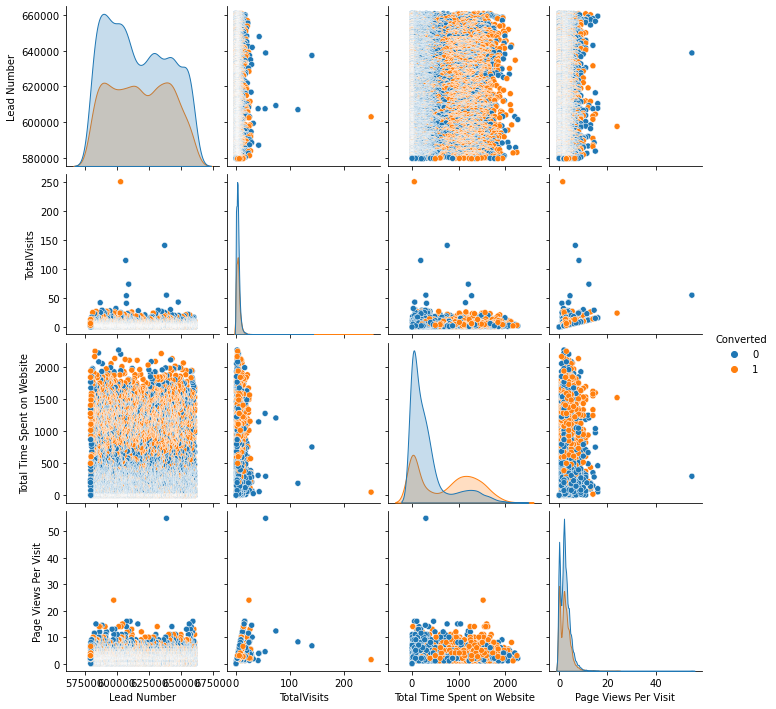

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(leads,diag_kind='kde',hue='Converted')
plt.show()

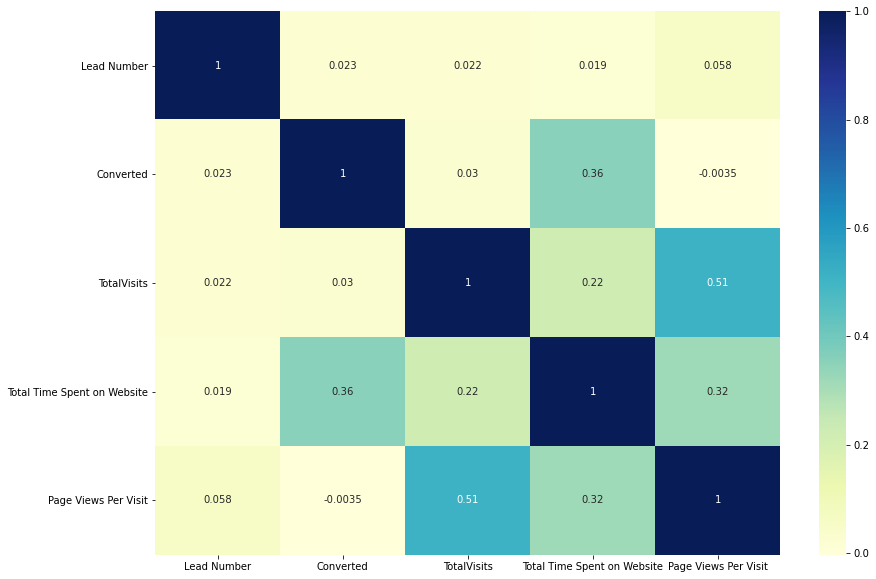

In [46]:
# visualizing correlation by heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(leads.corr(),  cmap="YlGnBu",annot=True)
plt.show()

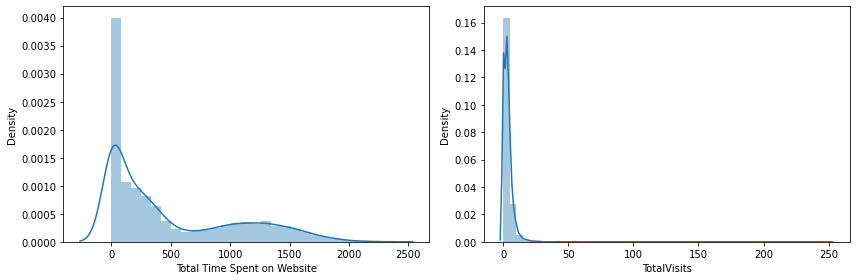

In [47]:
#Histogram
def plot_bars():
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    sns.distplot(leads['Total Time Spent on Website'])

    plt.subplot(122)
    sns.distplot(leads['TotalVisits'])

    plt.tight_layout()
    plt.show()
    
plot_bars()

**Observations**
- High peaks and skewed data. There might be a possibility of outliers. We will check them next

## Check for outliers

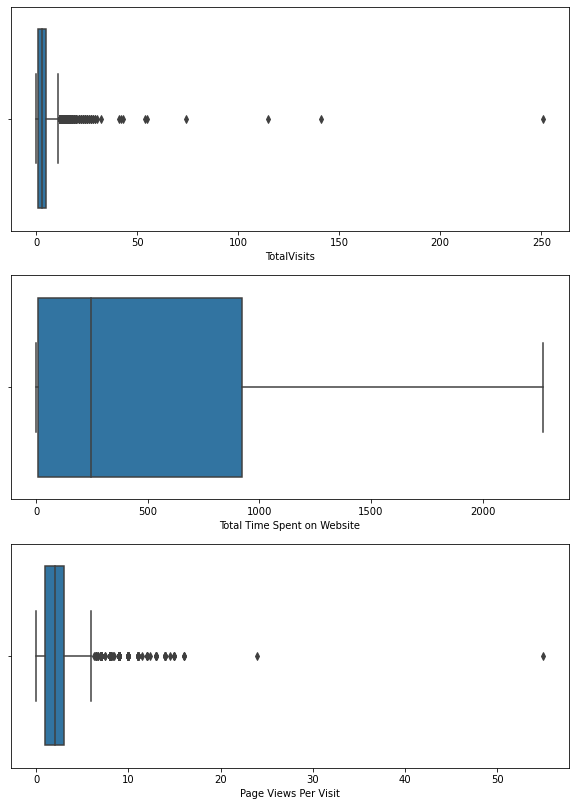

In [48]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(leads.TotalVisits)

plt.subplot(3,1,2)
sns.boxplot(leads['Total Time Spent on Website'])

plt.subplot(3,1,3)
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

**Observations**

* Looking at both the box plots and the statistics, there are upper bound outliers in both `total_visits` and `page_views_per_visit` columns. We can also see that the data can be capped at 99 percentile.

### Categorical columns

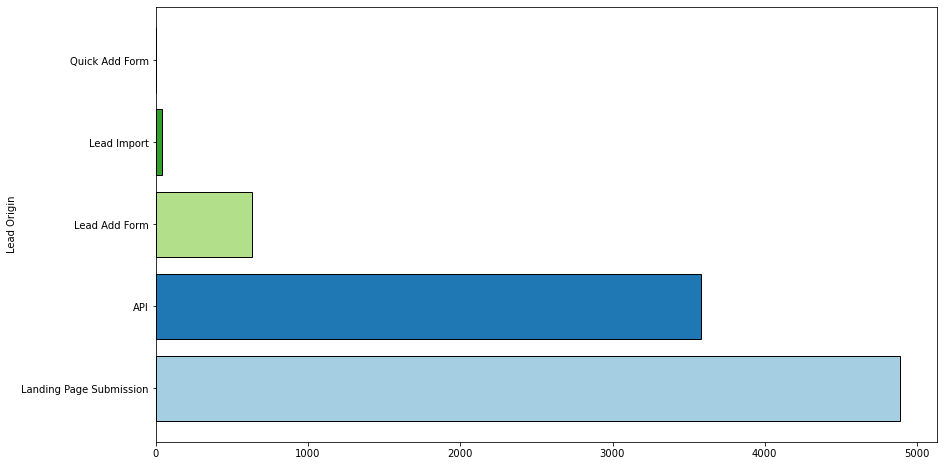

In [49]:
plt.figure(figsize = (14, 8))

leads.groupby('Lead Origin')['Lead Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(leads))))
plt.show()

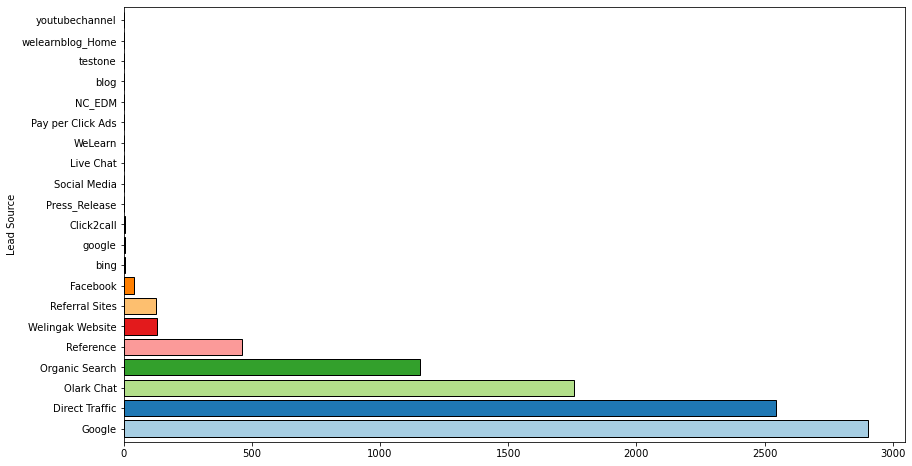

In [50]:
plt.figure(figsize = (14, 8))

leads.groupby('Lead Source')['Lead Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(leads))))
plt.show()

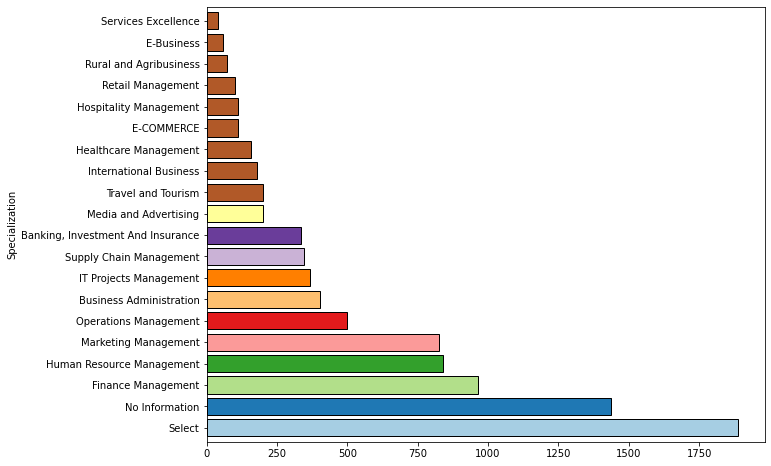

In [51]:
plt.figure(figsize = (10, 8))

leads.groupby('Specialization')['Lead Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(leads))))
plt.show()

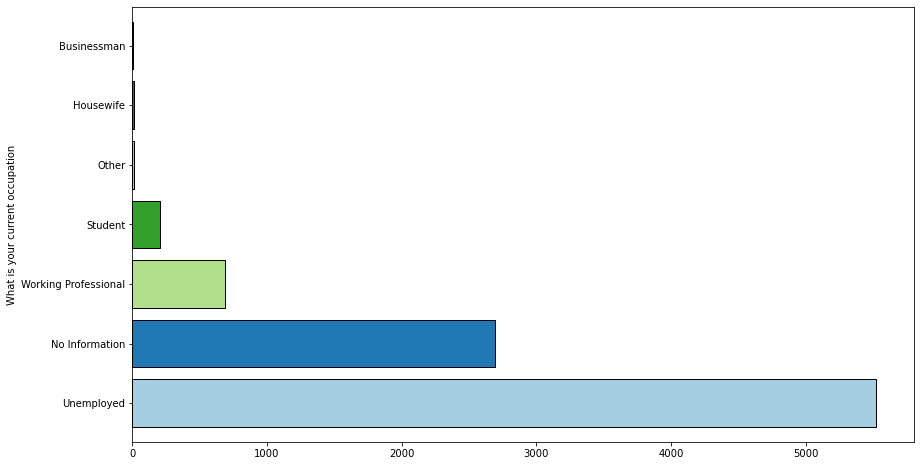

In [52]:
plt.figure(figsize = (14, 8))

leads.groupby('What is your current occupation')['Lead Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(leads))))
plt.show()

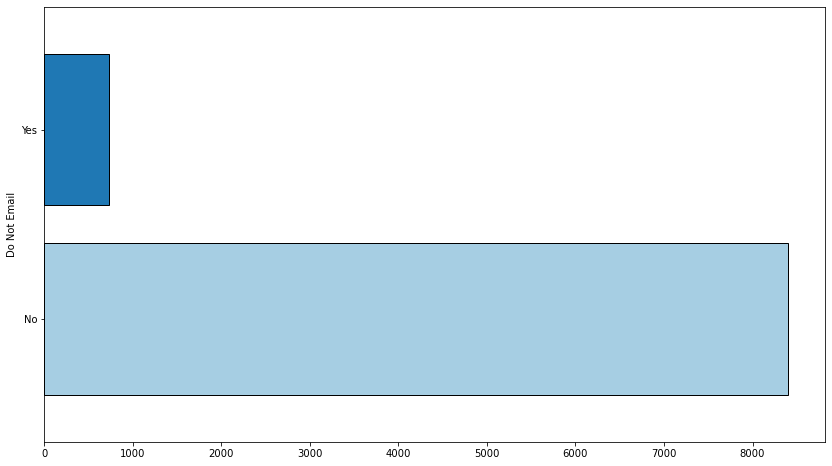

In [53]:
plt.figure(figsize = (14, 8))

leads.groupby('Do Not Email')['Lead Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(leads))))
plt.show()

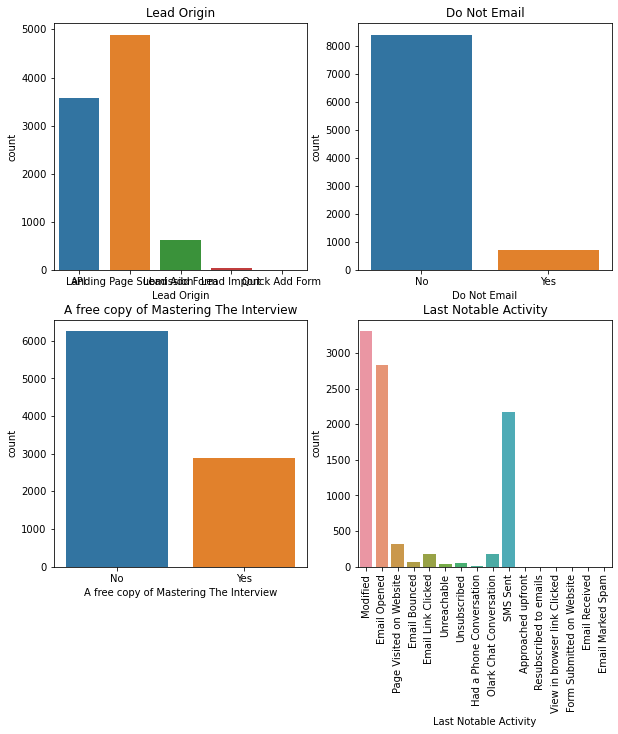

In [54]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.countplot(leads['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(leads['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(2,2,3)
sns.countplot(leads['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(2,2,4)
sns.countplot(leads['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')



plt.show()

**The following observations can be made from the above graphs obtained**
1) Unemployed people are most interested in taking up the course, they can be considered as significant leads.
2) People with Management degrees are most likely to be significant leads.

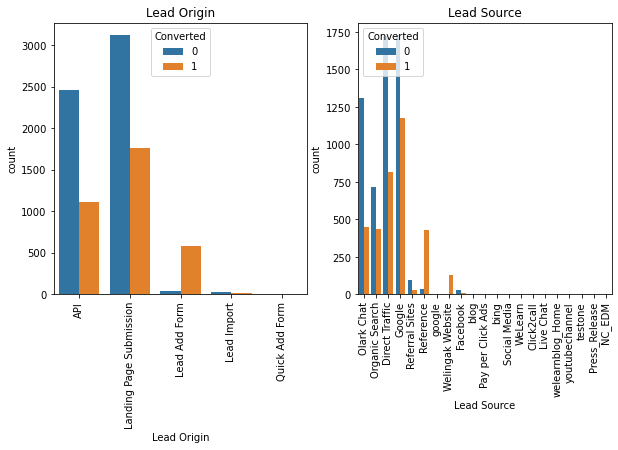

In [55]:
# Relating all the categorical variables to Converted
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

Text(0.5, 1.0, 'Do Not Email')

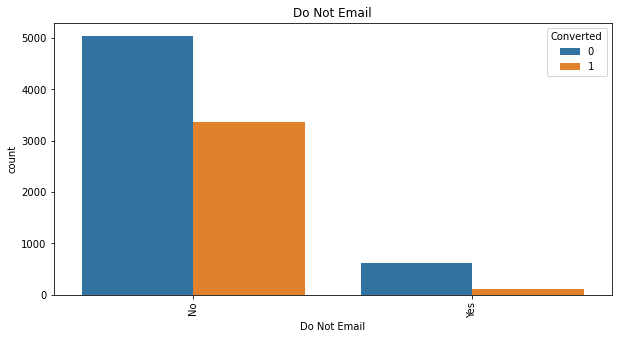

In [56]:
plt.figure(figsize = (10,5))

sns.countplot(x='Do Not Email', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')


Text(0.5, 1.0, 'Last Activity')

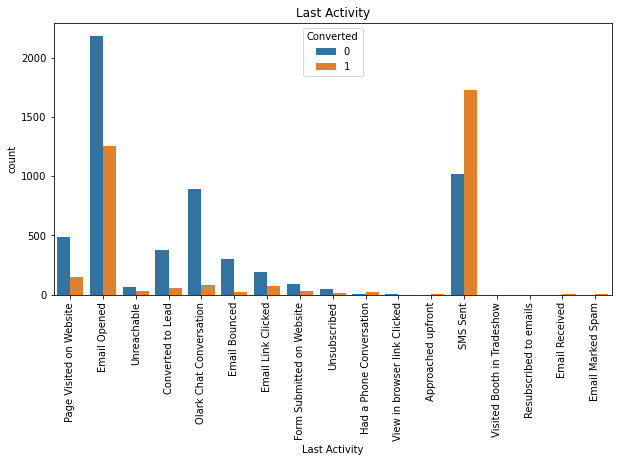

In [57]:
plt.figure(figsize = (10,5))

sns.countplot(x='Last Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')


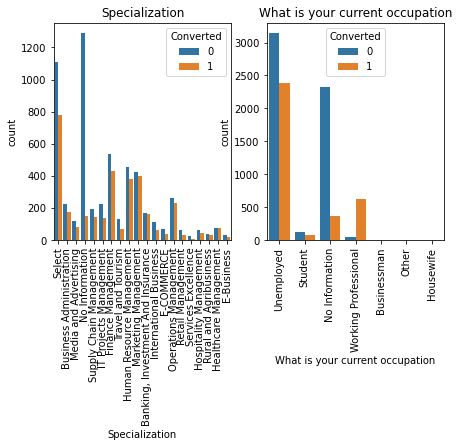

In [58]:
plt.figure(figsize = (7,4))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

In [59]:
#There are very few leads from working professionals that were not converted.

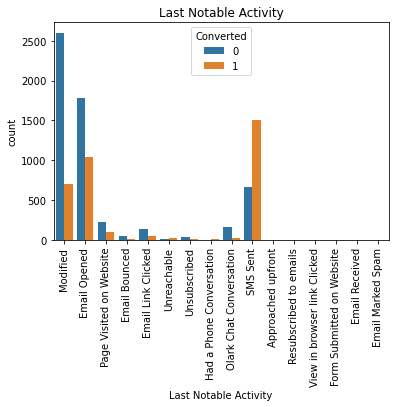

In [60]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

In [61]:
# Outlier Treatment
num_cols = leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9137.000000,9137.000000,9137.000000
mean,3.443581,482.491409,2.361470
std,4.845886,545.614027,2.157505
min,0.000000,0.000000,0.000000
25%,1.000000,10.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,921.000000,3.000000
90%,7.000000,1374.400000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.640000,9.000000


In [62]:
# capping at 99 percentile

leads['Page Views Per Visit'].loc[leads['Page Views Per Visit'] >= 
                            leads['Page Views Per Visit'].quantile(0.99)] = leads['Page Views Per Visit'].quantile(0.99)
leads['TotalVisits'].loc[leads['TotalVisits'] >= leads['TotalVisits'].quantile(0.99)] = leads['TotalVisits'].quantile(0.99)

<AxesSubplot:xlabel='Page Views Per Visit'>

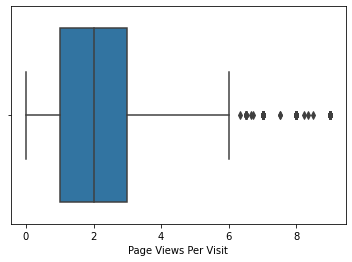

In [63]:
sns.boxplot(leads['Page Views Per Visit'])

<AxesSubplot:xlabel='TotalVisits'>

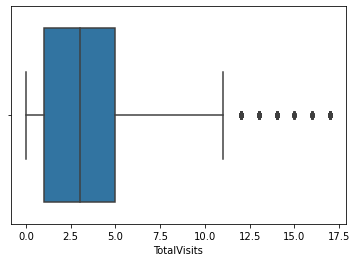

In [64]:
sns.boxplot(leads['TotalVisits'])

In [65]:
leads.drop('Lead Number', axis = 1, inplace = True)

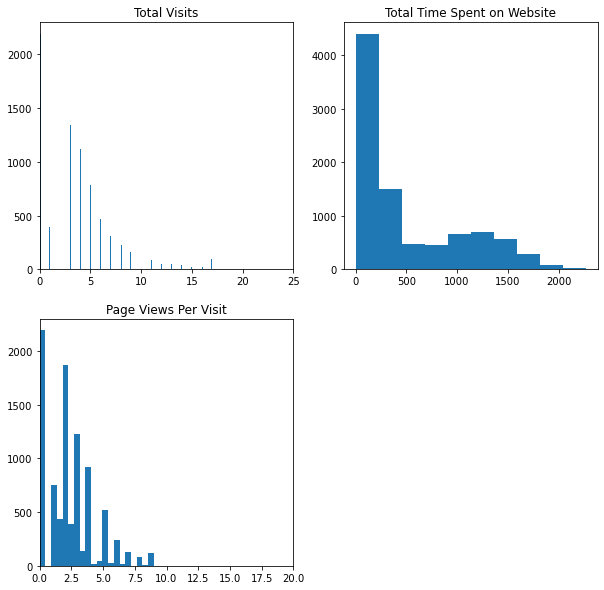

In [66]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(leads['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leads['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leads['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

## Model Building

### Dummy variable creation

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [67]:
# Check the columns which are of type 'object'

leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9137 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9137 non-null   object 
 1   Lead Source                             9137 non-null   object 
 2   Do Not Email                            9137 non-null   object 
 3   Converted                               9137 non-null   int64  
 4   TotalVisits                             9137 non-null   float64
 5   Total Time Spent on Website             9137 non-null   int64  
 6   Page Views Per Visit                    9137 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          9137 non-null   object 
 9   What is your current occupation         9137 non-null   object 
 10  A free copy of Mastering The Interview  9137 non-null   obje

In [68]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [69]:
# Creating dummy variable separately for the variable 'Specialization'
# since it has the level 'Select' 
# which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [70]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [71]:
# Let's take a look at the dataset again

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_No Information,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
#Numerical Variables
leads.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9137 entries, 0 to 9239
Data columns (total 86 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9137 non-null   int64  
 1   TotalVisits                                           9137 non-null   float64
 2   Total Time Spent on Website                           9137 non-null   int64  
 3   Page Views Per Visit                                  9137 non-null   float64
 4   Lead Origin_Landing Page Submission                   9137 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9137 non-null   uint8  
 6   Lead Origin_Lead Import                               9137 non-null   uint8  
 7   Lead Origin_Quick Add Form                            9137 non-null   uint8  
 8   Lead Source_Direct Traffic                            9137

### Test-Train Split

The next step is to split the dataset into training an testing sets.

In [73]:
# Import the required library

from sklearn.model_selection import train_test_split

In [74]:
# Split the dataset into 70% train and 30% test, random state = 100
df_train,df_test = train_test_split(leads,train_size = 0.7,random_state = 100)
print(df_train.shape)
print(df_test.shape)


(6395, 86)
(2742, 86)


### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [75]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [76]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6395 entries, 8701 to 5712
Data columns (total 86 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6395 non-null   int64  
 1   TotalVisits                                           6395 non-null   float64
 2   Total Time Spent on Website                           6395 non-null   int64  
 3   Page Views Per Visit                                  6395 non-null   float64
 4   Lead Origin_Landing Page Submission                   6395 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6395 non-null   uint8  
 6   Lead Origin_Lead Import                               6395 non-null   uint8  
 7   Lead Origin_Quick Add Form                            6395 non-null   uint8  
 8   Lead Source_Direct Traffic                            6

In [77]:
# There are 3 Columns - TotalVisits,Total Time Spent on Website,Page Views Per Visit which are numeric and needs scaling.
# Using minmaxscaler we will scale these columns so that these don't skew our analysis later.
scaler = MinMaxScaler()

In [78]:
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [79]:
# apply scaling function on identified list of numeric variables in training dataset

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [80]:
# Check data post scaling

df_train[num_vars].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
8701,0.058824,0.261444,0.111111
6684,0.294118,0.644806,0.555556
4406,0.000000,0.000000,0.000000
2487,0.000000,0.000000,0.000000
561,0.176471,0.722271,0.333333


### Looking at the correlations

Let's now look at the correlations on training dataset. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

In [81]:
df_train.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_No Information,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.038772,0.352545,-0.006332,-0.055516,0.305787,-0.014499,NaN,-0.081228,-0.012900,...,-0.014495,0.064804,0.019987,-0.241198,0.035092,0.000031,0.002462,-0.019012,0.002854,-0.007321
TotalVisits,0.038772,1.000000,0.325147,0.709768,0.414682,-0.245616,-0.050582,NaN,0.113431,-0.049048,...,0.051202,0.029157,0.073568,-0.243616,0.040953,0.044100,0.053281,0.021011,0.062593,0.106425
Total Time Spent on Website,0.352545,0.325147,1.000000,0.334583,0.289907,-0.186051,-0.042874,NaN,0.145150,-0.041538,...,0.018953,0.069060,0.039542,-0.215029,0.066338,0.038881,0.013703,-0.003646,0.033563,0.054873
Page Views Per Visit,-0.006332,0.709768,0.334583,1.000000,0.521622,-0.289093,-0.055730,NaN,0.139258,-0.053938,...,0.066204,0.054512,0.075410,-0.297638,0.061999,0.039885,0.029505,0.012960,0.077409,0.121940
Lead Origin_Landing Page Submission,-0.055516,0.414682,0.289907,0.521622,1.000000,-0.291665,-0.072777,NaN,0.518118,-0.071505,...,0.091547,0.128304,0.088315,-0.434005,0.136758,0.080307,0.060237,0.052434,0.131131,0.114805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,0.000031,0.044100,0.038881,0.039885,0.080307,-0.016819,-0.007152,NaN,0.037376,-0.007027,...,-0.015082,-0.033145,-0.015383,-0.045699,-0.025419,1.000000,-0.009959,-0.007514,-0.020696,-0.016025
Specialization_Rural and Agribusiness,0.002462,0.053281,0.013703,0.029505,0.060237,-0.012106,-0.006344,NaN,0.023978,-0.006233,...,-0.013379,-0.029402,-0.013645,-0.040538,-0.022548,-0.009959,1.000000,-0.006665,-0.018358,-0.014215
Specialization_Services Excellence,-0.019012,0.021011,-0.003646,0.012960,0.052434,-0.010390,-0.004786,NaN,0.059761,-0.004703,...,-0.010094,-0.022184,-0.010295,-0.030586,-0.017012,-0.007514,-0.006665,1.000000,-0.013851,-0.010725
Specialization_Supply Chain Management,0.002854,0.062593,0.033563,0.077409,0.131131,-0.019857,-0.013183,NaN,0.101149,-0.012953,...,-0.027802,-0.061099,-0.028356,-0.084240,-0.046856,-0.020696,-0.018358,-0.013851,1.000000,-0.029539


<Figure size 1080x720 with 0 Axes>

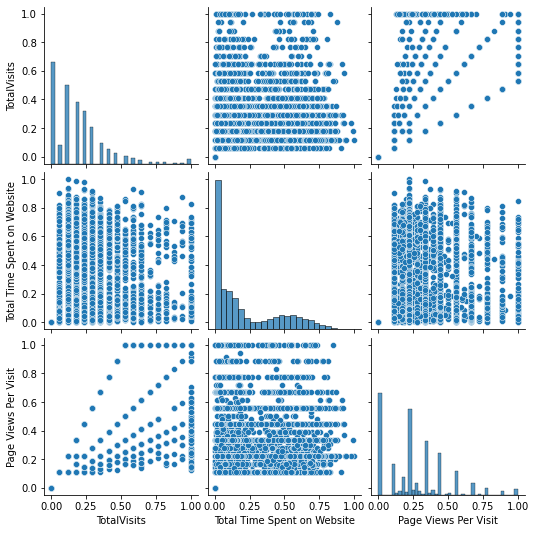

In [82]:
# Check the scatter plot to analyze correlation between numeric variables

plt.figure(figsize=(15,10))
sns.pairplot(df_train[num_vars])
plt.show()

## Step 2: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [83]:
# Define datasets to build the model 

y_train = df_train.pop('Converted')
X_train = df_train

In [84]:
# Import 'LogisticRegression' and create a LogisticRegression object

# import LogisticRegression
# Create an object "logreg"

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Fit the model using logreg.fit()

logreg.fit(X_train, y_train)


LogisticRegression()

In [85]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
             # running RFE with 15 variables as output
rfe = RFE(logreg, 15) # Identify 15 columns of importance

rfe = rfe.fit(X_train, y_train)

In [86]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 63),
 ('Lead Origin_Quick Add Form', False, 67),
 ('Lead Source_Direct Traffic', False, 34),
 ('Lead Source_Facebook', False, 64),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Live Chat', False, 58),
 ('Lead Source_NC_EDM', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 69),
 ('Lead Source_Press_Release', False, 59),
 ('Lead Source_Reference', False, 65),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Social Media', False, 70),
 ('Lead Source_WeLearn', False, 49),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 46),
 ('Lead Source_blog', False, 50),
 ('Lead Source_google', False, 57),
 ('Lead Source_testone', False, 51),
 ('

In [87]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_No Information',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [88]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [89]:
# Import statsmodels

import statsmodels.api as sm

In [90]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6379
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2606.4
Date:                Wed, 08 Dec 2021   Deviance:                       5212.8
Time:                        12:45:30   Pearson chi2:                 6.45e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.1313      0.119    -26.271      0.000      -3.365      -2.898
TotalVisits                                              0.9278      0.215      4.317      0.000       0.507       1.349
Total Time Spent on Website                              4.5774      0.169     27.022      0.000       4.245       4.909
Lead Origin_Lead Add Form                                3.8033      0.217     17.535      0.000       3.378       4.228
Lead Source_Olark Chat                                   1.5427      0.115     13.462      0.000       1.318       1.767
Lead Source_Welingak Website                            22.4923   1.36e+04      0.002      0.999   -2.66e+04    2.66e+04
Do Not Email_Yes                                        -1.2246      0.183     -6.699      0.000      -1.583      -0.866
Last Activity_Email Opened                               0.9879      0.094     10.490      0.000       0.803       1.172
Last Activity_Had a Phone Conversation                   0.6836      0.828      0.826      0.409      -0.939       2.306
Last Activity_SMS Sent                                   2.0710      0.098     21.205      0.000       1.880       2.262
Last Activity_Unsubscribed                               2.0100      0.465      4.319      0.000       1.098       2.922
What is your current occupation_Housewife               24.9049   4.22e+04      0.001      1.000   -8.26e+04    8.27e+04
What is your current occupation_No Information          -1.2908      0.087    -14.797      0.000      -1.462      -1.120
What is your current occupation_Working Professional     2.5199      0.190     13.291      0.000       2.148       2.891
Last Notable Activity_Had a Phone Conversation           3.2978      1.446      2.281      0.023       0.464       6.132
Last Notable Activity_Unreachable                        2.7006      0.544      4.964      0.000       1.634       3.767
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [91]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.21
1,Total Time Spent on Website,2.03
6,Last Activity_Email Opened,1.79
8,Last Activity_SMS Sent,1.70
7,Last Activity_Had a Phone Conversation,1.68
13,Last Notable Activity_Had a Phone Conversation,1.67
2,Lead Origin_Lead Add Form,1.49
11,What is your current occupation_No Information,1.43
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.25


VIFs seem to be in a decent range except for three variables. 

Let's first drop the variable `Lead Source_Welingak Website` since it has a high p-value.

In [93]:
X_train_rfe = X_train.drop('Lead Source_Welingak Website',axis = 1)

In [94]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6380
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.2
Date:                Wed, 08 Dec 2021   Deviance:                       5230.4
Time:                        12:45:31   Pearson chi2:                 6.68e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.1287      0.119    -26.272      0.000      -3.362      -2.895
TotalVisits                                              0.9237      0.215      4.298      0.000       0.503       1.345
Total Time Spent on Website                              4.5755      0.169     27.015      0.000       4.244       4.907
Lead Origin_Lead Add Form                                4.1095      0.213     19.252      0.000       3.691       4.528
Lead Source_Olark Chat                                   1.5409      0.115     13.448      0.000       1.316       1.765
Do Not Email_Yes                                        -1.2194      0.182     -6.704      0.000      -1.576      -0.863
Last Activity_Email Opened                               0.9864      0.094     10.486      0.000       0.802       1.171
Last Activity_Had a Phone Conversation                   0.6631      0.835      0.795      0.427      -0.973       2.299
Last Activity_SMS Sent                                   2.0712      0.098     21.239      0.000       1.880       2.262
Last Activity_Unsubscribed                               1.9880      0.468      4.247      0.000       1.071       2.905
What is your current occupation_Housewife               22.8772   1.54e+04      0.001      0.999   -3.01e+04    3.01e+04
What is your current occupation_No Information          -1.2913      0.087    -14.803      0.000      -1.462      -1.120
What is your current occupation_Working Professional     2.5096      0.190     13.215      0.000       2.137       2.882
Last Notable Activity_Had a Phone Conversation           3.3177      1.450      2.288      0.022       0.476       6.160
Last Notable Activity_Unreachable                        2.6971      0.545      4.953      0.000       1.630       3.764
========================================================================================================================
"""

The variable `Last Activity_Had a Phone Conversation` also needs to be dropped.

In [95]:
X_train_rfe.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [96]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6381
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.5
Date:                Wed, 08 Dec 2021   Deviance:                       5231.1
Time:                        12:45:31   Pearson chi2:                 6.68e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.1238      0.119    -26.282      0.000      -3.357      -2.891
TotalVisits                                              0.9246      0.215      4.302      0.000       0.503       1.346
Total Time Spent on Website                              4.5777      0.169     27.029      0.000       4.246       4.910
Lead Origin_Lead Add Form                                4.1121      0.213     19.272      0.000       3.694       4.530
Lead Source_Olark Chat                                   1.5399      0.115     13.441      0.000       1.315       1.764
Do Not Email_Yes                                        -1.2217      0.182     -6.717      0.000      -1.578      -0.865
Last Activity_Email Opened                               0.9809      0.094     10.463      0.000       0.797       1.165
Last Activity_SMS Sent                                   2.0659      0.097     21.246      0.000       1.875       2.257
Last Activity_Unsubscribed                               1.9846      0.468      4.240      0.000       1.067       2.902
What is your current occupation_Housewife               22.8756   1.54e+04      0.001      0.999   -3.01e+04    3.01e+04
What is your current occupation_No Information          -1.2917      0.087    -14.808      0.000      -1.463      -1.121
What is your current occupation_Working Professional     2.5137      0.190     13.244      0.000       2.142       2.886
Last Notable Activity_Had a Phone Conversation           3.9755      1.191      3.339      0.001       1.642       6.309
Last Notable Activity_Unreachable                        2.6917      0.545      4.943      0.000       1.624       3.759
========================================================================================================================
"""

In [97]:
# Make a VIF dataframe for all the variables present


vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.21
1,Total Time Spent on Website,2.02
5,Last Activity_Email Opened,1.78
6,Last Activity_SMS Sent,1.69
9,What is your current occupation_No Information,1.43
3,Lead Source_Olark Chat,1.33
2,Lead Origin_Lead Add Form,1.23
4,Do Not Email_Yes,1.17
10,What is your current occupation_Working Profes...,1.16
7,Last Activity_Unsubscribed,1.08


In [98]:
X_train_rfe.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [99]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6382
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2620.9
Date:                Wed, 08 Dec 2021   Deviance:                       5241.8
Time:                        12:45:31   Pearson chi2:                 6.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.1129      0.119    -26.251      0.000      -3.345      -2.880
TotalVisits                                              0.9132      0.215      4.252      0.000       0.492       1.334
Total Time Spent on Website                              4.5759      0.169     27.051      0.000       4.244       4.907
Lead Origin_Lead Add Form                                4.1120      0.213     19.290      0.000       3.694       4.530
Lead Source_Olark Chat                                   1.5320      0.114     13.389      0.000       1.308       1.756
Do Not Email_Yes                                        -1.2248      0.182     -6.735      0.000      -1.581      -0.868
Last Activity_Email Opened                               0.9814      0.094     10.485      0.000       0.798       1.165
Last Activity_SMS Sent                                   2.0603      0.097     21.213      0.000       1.870       2.251
Last Activity_Unsubscribed                               1.9812      0.468      4.233      0.000       1.064       2.899
What is your current occupation_No Information          -1.2954      0.087    -14.858      0.000      -1.466      -1.125
What is your current occupation_Working Professional     2.5077      0.190     13.217      0.000       2.136       2.880
Last Notable Activity_Had a Phone Conversation           3.9709      1.191      3.335      0.001       1.637       6.304
Last Notable Activity_Unreachable                        2.6868      0.545      4.932      0.000       1.619       3.754
========================================================================================================================
"""

In [100]:
# Make a VIF dataframe for all the variables present


vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.21
1,Total Time Spent on Website,2.02
5,Last Activity_Email Opened,1.78
6,Last Activity_SMS Sent,1.69
8,What is your current occupation_No Information,1.43
3,Lead Source_Olark Chat,1.33
2,Lead Origin_Lead Add Form,1.23
4,Do Not Email_Yes,1.17
9,What is your current occupation_Working Profes...,1.16
7,Last Activity_Unsubscribed,1.08


All VIFs are <5, which means this model is good to be evaluated!

## Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [101]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8701    0.040278
6684    0.896972
4406    0.939513
2487    0.618292
561     0.917546
473     0.172993
5046    0.131062
6906    0.903820
6992    0.109113
3805    0.619657
dtype: float64

In [102]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04027757, 0.89697226, 0.93951259, 0.61829241, 0.91754611,
       0.17299291, 0.13106202, 0.90381988, 0.10911317, 0.61965687])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [103]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.040278
1,0,0.896972
2,1,0.939513
3,1,0.618292
4,0,0.917546


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [104]:
y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.5 else 0)

In [105]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.040278,0
1,0,0.896972,1
2,1,0.939513,1
3,1,0.618292,1
4,0,0.917546,1


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [106]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [107]:
# Create confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3526,  438],
       [ 733, 1698]])

In [108]:
# Predicted     not_churn    churn
# Actual
# not_churn        1924      388
# churn            572       1577  

In [109]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8168881939014855


In [110]:
# Let's evaluate the other metrics as well
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [111]:
# Calculate the sensitivity
print(TP/(TP+FN))

0.6984779925956397


In [112]:
# Calculate the specificity

print(TN/(TN+FP))

0.8895055499495459


### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [113]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [114]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [115]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

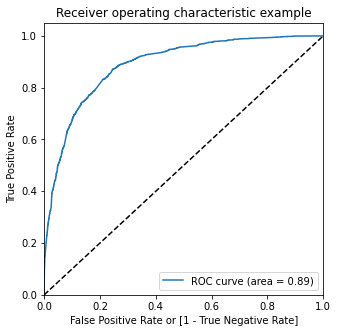

In [116]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.89 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [117]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.040278,0,1,0,0,0,0,0,0,0,0,0
1,0,0.896972,1,1,1,1,1,1,1,1,1,1,0
2,1,0.939513,1,1,1,1,1,1,1,1,1,1,1
3,1,0.618292,1,1,1,1,1,1,1,1,0,0,0
4,0,0.917546,1,1,1,1,1,1,1,1,1,1,1


In [118]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total2=sum(sum(cm2))
    accuracy = (cm2[0,0]+cm2[1,1])/total2
    speci = cm2[0,0]/(cm2[0,0]+cm2[0,1])
    sensi = cm2[1,1]/(cm2[1,0]+cm2[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380141  1.000000  0.000000
0.1   0.1  0.624081  0.975319  0.408678
0.2   0.2  0.761845  0.914439  0.668264
0.3   0.3  0.796716  0.873715  0.749495
0.4   0.4  0.812823  0.761415  0.844349
0.5   0.5  0.816888  0.698478  0.889506
0.6   0.6  0.808757  0.631427  0.917508
0.7   0.7  0.780766  0.509667  0.947023
0.8   0.8  0.757310  0.416701  0.966196
0.9   0.9  0.712744  0.264912  0.987386


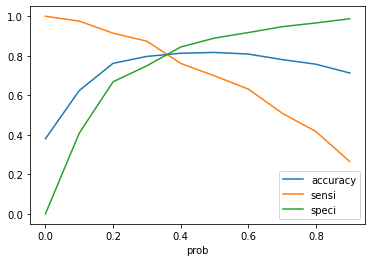

In [119]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.37, you get the optimal values of the three metrics. So let's choose 0.37 as our cutoff now.

In [120]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.040278,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.896972,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.939513,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.618292,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.917546,1,1,1,1,1,1,1,1,1,1,1,1


In [121]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8107896794370602

In [122]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2



array([[3305,  659],
       [ 551, 1880]])

In [123]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
# Calculate Sensitivity

TP/(TP+FN)

0.7733443027560675

In [125]:
# Calculate Specificity

TN/(TN+FP)

0.8337537840565086

In [126]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Conversion_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,lead_score
0,1,0.040278,0,1,0,0,0,0,0,0,0,0,0,0,4
1,0,0.896972,1,1,1,1,1,1,1,1,1,1,0,1,90
2,1,0.939513,1,1,1,1,1,1,1,1,1,1,1,1,94
3,1,0.618292,1,1,1,1,1,1,1,1,0,0,0,1,62
4,0,0.917546,1,1,1,1,1,1,1,1,1,1,1,1,92
5,0,0.172993,0,1,1,0,0,0,0,0,0,0,0,0,17
6,0,0.131062,0,1,1,0,0,0,0,0,0,0,0,0,13
7,1,0.903820,1,1,1,1,1,1,1,1,1,1,1,1,90
8,0,0.109113,0,1,1,0,0,0,0,0,0,0,0,0,11
9,0,0.619657,1,1,1,1,1,1,1,1,0,0,0,1,62


In [127]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

y_train_pred_final[y_train_pred_final['Converted'] == 1].Final_Predicted.value_counts()

1    1880
0     551
Name: Final_Predicted, dtype: int64

In [128]:
1851/float(1851+580)

0.7614150555327026

With this cutoff point(0.38) we observe that the Accuracy is not improved , but sensitivity is improved by a good 8%. Even if the specificity is reduced by almost 6%, this appears to be a balanced set of metrics and hence the cutoff point appears to be good.
Also, the lead conversion comes out to be 77% which is close to X-Education CEO's ask of 80%. Let us see if this rate increases based on test dataset evaluation.

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [129]:
#Looking at the confusion matrix again

In [130]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3526,  438],
       [ 733, 1698]])

##### Precision
TP / TP + FP

In [131]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7949438202247191

##### Recall
TP / TP + FN

In [132]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6984779925956397

### Precision and recall tradeoff

In [133]:
from sklearn.metrics import precision_recall_curve

In [134]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6390    0
 6391    1
 6392    0
 6393    0
 6394    0
 Name: Converted, Length: 6395, dtype: int64,
 0       0
 1       1
 2       1
 3       1
 4       1
        ..
 6390    0
 6391    1
 6392    0
 6393    0
 6394    0
 Name: Predicted, Length: 6395, dtype: int64)

In [135]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

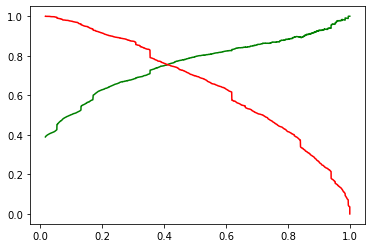

In [136]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [137]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,lead_score,final_predicted
0,1,0.040278,0,1,0,0,0,0,0,0,0,0,0,0,4,0
1,0,0.896972,1,1,1,1,1,1,1,1,1,1,0,1,90,1
2,1,0.939513,1,1,1,1,1,1,1,1,1,1,1,1,94,1
3,1,0.618292,1,1,1,1,1,1,1,1,0,0,0,1,62,1
4,0,0.917546,1,1,1,1,1,1,1,1,1,1,1,1,92,1


In [138]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8128225175918686

In [139]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3347,  617],
       [ 580, 1851]])

In [140]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
# Calculate Precision

TP/(TP+FP)

0.75

In [142]:
# Calculate Recall

TP/(TP+FN)

0.7614150555327026

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [143]:
# Define the test datasets
y_test = df_test.pop('Converted')
X_test = df_test

In [144]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [145]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
5080,0.176471,0.594190,0,0,0,0,1,0,0,0,0,0,0,0,0
1893,0.470588,0.069102,0,0,0,0,1,0,0,0,0,1,0,0,0
5432,0.000000,0.000000,0,1,0,1,0,0,1,0,0,1,0,0,0
3549,0.235294,0.530370,0,0,0,0,0,0,1,0,0,0,1,0,0
8231,0.294118,0.013644,0,0,0,0,0,0,1,0,0,0,0,0,0


In [146]:
X_test_sm = sm.add_constant(X_test)

In [147]:
X_test.drop(['Lead Source_Welingak Website', 'Last Activity_Had a Phone Conversation', 'What is your current occupation_Housewife'], 1, 
                                inplace = True)

In [148]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [149]:
y_test_pred[:10]

5080    0.677019
1893    0.064082
5432    0.115770
3549    0.983786
8231    0.326286
4072    0.141534
943     0.937388
2246    0.528138
1883    0.952673
5630    0.131062
dtype: float64

In [150]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [151]:
# Let's see the head

y_pred_1.head()

,0
5080,0.677019
1893,0.064082
5432,0.115770
3549,0.983786
8231,0.326286


In [152]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [153]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [154]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [155]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.677019
1,0,0.064082
2,1,0.115770
3,1,0.983786
4,0,0.326286


In [156]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [157]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.677019
1,0,0.064082
2,1,0.115770
3,1,0.983786
4,0,0.326286


In [158]:
y_pred_final['lead_score'] = y_pred_final.Conversion_Prob.map(lambda x: round(x*100))
y_pred_final.head(2)

,Converted,Conversion_Prob,lead_score
0,1,0.677019,68
1,0,0.064082,6


In [159]:
# Make predictions on the test set using 0.37 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [160]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,lead_score,final_predicted
0,1,0.677019,68,1
1,0,0.064082,6,0
2,1,0.115770,12,0
3,1,0.983786,98,1
4,0,0.326286,33,0


In [161]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates


y_pred_final[y_pred_final['Converted'] == 1].final_predicted.value_counts()


1    823
0    226
Name: final_predicted, dtype: int64

In [162]:
823/float(823+226)

0.784556720686368

We can see that the overall lead conversion on predictions based on test dataset is ~79%, close to the ballpark of 80% which is set by the CEO.
Also, to be noted is the lead conversion is 3% more on test dataset compared to same calcuated on train dataset.

In [163]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8034281546316557

In [164]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1380,  313],
       [ 226,  823]])

In [165]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [166]:
# Calculate Precision

TP/(TP+FP)

0.7244718309859155

In [167]:
# Calculate Recall

TP/(TP+FN)

0.784556720686368

## Conclusion :
    
    - While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, the
      optimal cut off chosen is based on Sensitivity and Specificity for calculating the final prediction.
    - Accuracy, Sensitivity and Specificity values of test set are around 81%, 72% and 78% and these are approximately same as respective values calculated using trained set.
    - Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
    - Hence overall this model seems to be good.  